In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

In [ ]:
df

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,8042,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,245,91,2,True
8043,8043,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,30,-10,2,False
8044,8044,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,23,-6,4,True
8045,8045,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,108,-19,3,False


In [ ]:
df.head()

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [ ]:
df.tail()

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
8042,8042,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,245,91,2,True
8043,8043,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,30,-10,2,False
8044,8044,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,23,-6,4,True
8045,8045,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,108,-19,3,False
8046,8046,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Technology,Phones,"Motorola Audio Dock, VoIP",0.0,867,251,5,False


In [ ]:
df.shape

(8047, 18)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Order Date', 'Customer Name', 'Country',
       'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category',
       'Sub-Category', 'Product Name', 'Discount', 'Sales', 'Profit',
       'Quantity', 'Feedback?'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Order ID,0
Order Date,0
Customer Name,0
Country,0
State,0
City,0
Region,0
Segment,0
Ship Mode,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8047 non-null   int64  
 1   Order ID       8047 non-null   object 
 2   Order Date     8047 non-null   object 
 3   Customer Name  8047 non-null   object 
 4   Country        8047 non-null   object 
 5   State          8047 non-null   object 
 6   City           8047 non-null   object 
 7   Region         8047 non-null   object 
 8   Segment        8047 non-null   object 
 9   Ship Mode      8047 non-null   object 
 10  Category       8047 non-null   object 
 11  Sub-Category   8047 non-null   object 
 12  Product Name   8047 non-null   object 
 13  Discount       8047 non-null   float64
 14  Sales          8047 non-null   int64  
 15  Profit         8047 non-null   int64  
 16  Quantity       8047 non-null   int64  
 17  Feedback?      8047 non-null   bool   
dtypes: bool(

In [ ]:
df.describe()

,Unnamed: 0,Discount,Sales,Profit,Quantity
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,4023.000000,0.110047,291.845657,35.198211,3.772089
std,2323.113141,0.181773,485.212156,178.125844,2.203369
min,0.000000,0.000000,3.000000,-3060.000000,1.000000
25%,2011.500000,0.000000,48.000000,1.000000,2.000000
50%,4023.000000,0.000000,117.000000,14.000000,3.000000
75%,6034.500000,0.100000,313.000000,47.000000,5.000000
max,8046.000000,0.850000,6517.000000,2476.000000,14.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Profit'}>],
       [<Axes: title={'center': 'Quantity'}>, <Axes: >]], dtype=object)

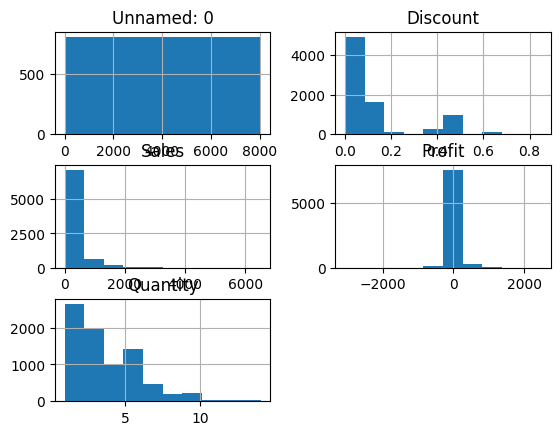

In [ ]:
df.hist()

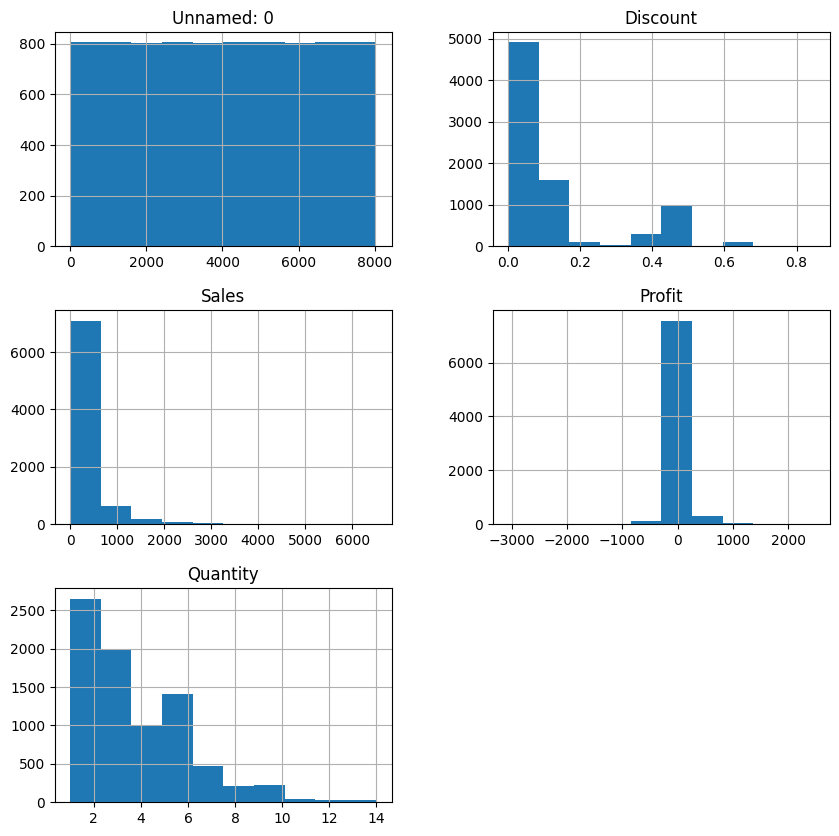

In [ ]:
df.hist(figsize=(10,10))
plt.show()

/tmp/ipython-input-4289362622.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x='Profit',data=df,hue='Profit',color='blue')


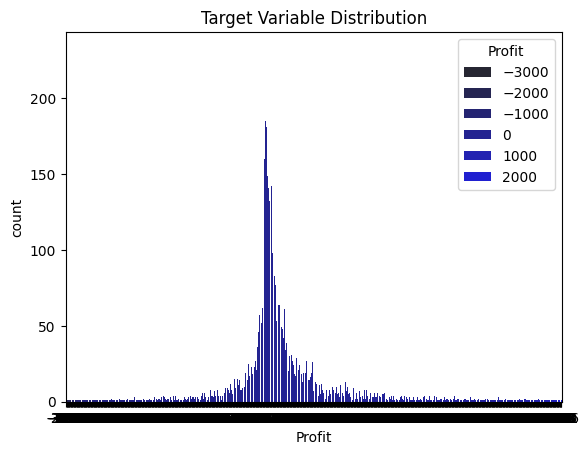

In [ ]:
sns.countplot(x='Profit',data=df,hue='Profit',color='blue')
plt.title("Target Variable Distribution")
plt.show()

<Axes: >

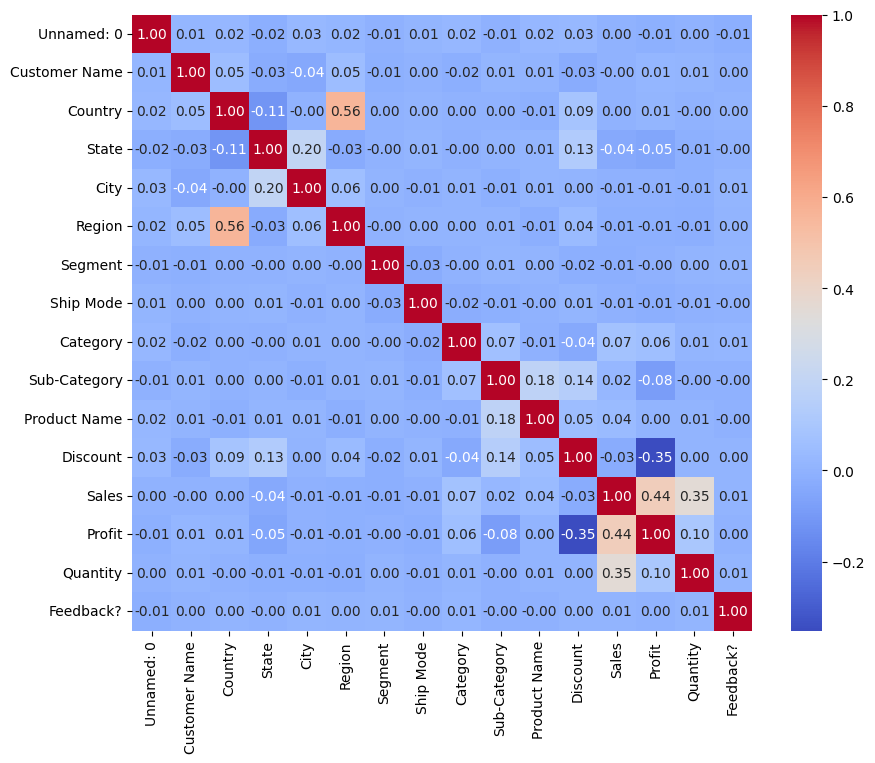

In [ ]:
df_numeric = df.drop(columns=['Order ID', 'Order Date'])
a=df_numeric.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(a,annot=True,fmt='.2f',cmap='coolwarm')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Custmer Name'] = le.fit_transform(df['Customer Name'])
df['Country'] = le.fit_transform(df['Country'])
df['State'] = le.fit_transform(df['State'])
df['Region'] = le.fit_transform(df['Region'])
df['City'] = le.fit_transform(df['City'])
df['Segment'] = le.fit_transform(df['Segment'])
df['Ship Mode'] = le.fit_transform(df['Ship Mode'])
df['Category'] = le.fit_transform(df['Category'])
df['Sub-Category']=le.fit_transform(df['Sub-Category'])
df['Product Name']=le.fit_transform(df['Product Name'])




df.head()

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Custmer Name
0,0,BN-2011-7407039,2011-01-01,677,12,103,847,1,2,1,1,12,670,0.5,45,-26,3,False,677
1,1,AZ-2011-9050313,2011-01-03,724,14,41,841,1,0,0,0,4,513,0.0,854,290,7,True,724
2,2,AZ-2011-6674300,2011-01-04,177,4,7,909,0,0,0,1,2,294,0.0,140,21,3,True,177
3,3,BN-2011-2819714,2011-01-04,540,14,41,109,1,1,0,1,2,306,0.5,27,-22,2,True,540
4,4,BN-2011-2819714,2011-01-04,540,14,41,109,1,1,0,1,14,585,0.5,17,-1,2,True,540


In [ ]:
label_encoder = LabelEncoder()
df['Category']=label_encoder.fit_transform(df['Category'])

In [ ]:
label_encoder = LabelEncoder()
df['Customer Name']=label_encoder.fit_transform(df['Customer Name'])

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


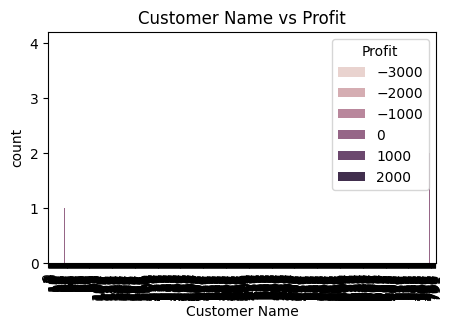

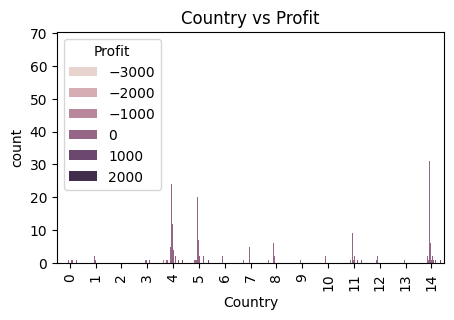

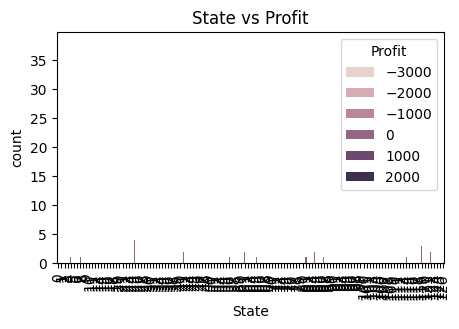

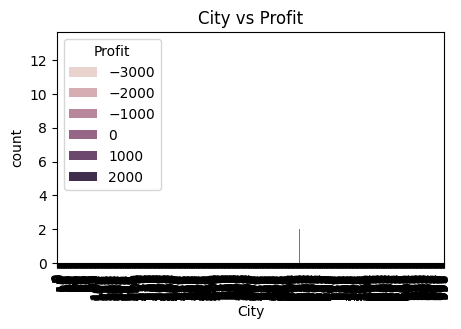

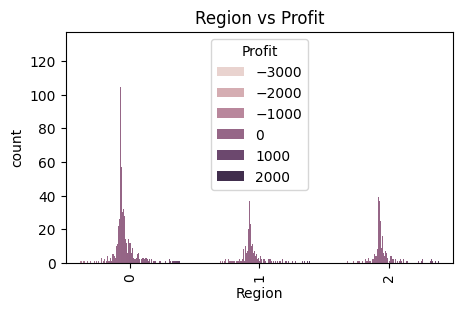

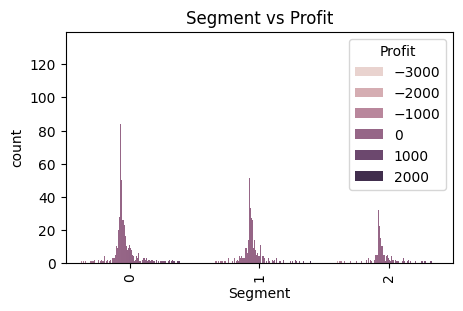

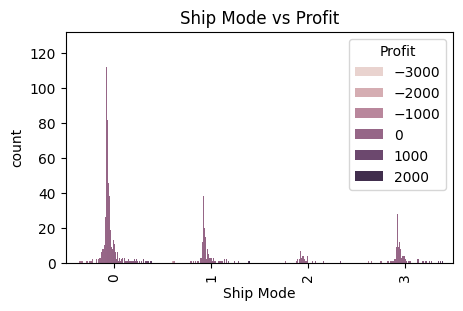

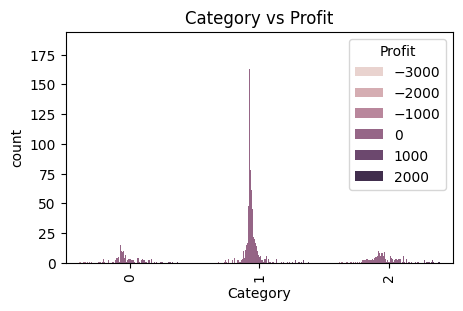

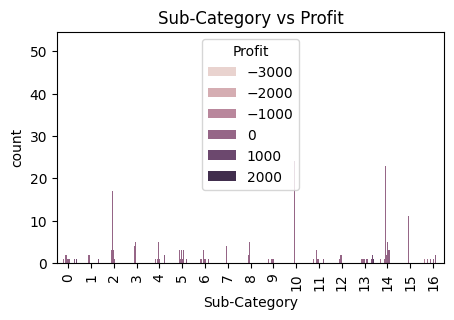

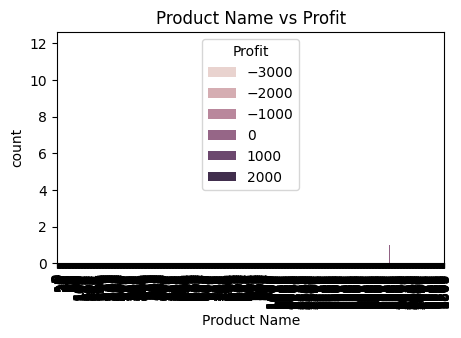

In [ ]:
cat = ['Customer Name',	'Country',	'State',	'City',	'Region',	'Segment',	'Ship Mode',	'Category',	'Sub-Category',	'Product Name']
for col in cat:
  plt.figure(figsize=(5,3))
  sns.countplot(data=df,x=col,hue="Profit")
  plt.title(f"{col} vs Profit")
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
label_encoder = LabelEncoder()
df['Customer Name'] = label_encoder.fit_transform(df['Customer Name'])

In [ ]:
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

In [ ]:
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [ ]:
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

In [ ]:
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])

In [ ]:
label_encoder = LabelEncoder()
df['Segment'] = label_encoder.fit_transform(df['Segment'])

In [ ]:
label_encoder = LabelEncoder()
df['Ship Mode'] = label_encoder.fit_transform(df['Ship Mode'])

In [ ]:
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [ ]:
label_encoder = LabelEncoder()
df['Sub-Category'] = label_encoder.fit_transform(df['Sub-Category'])

In [ ]:
label_encoder = LabelEncoder()
df['Product Name'] = label_encoder.fit_transform(df['Product Name'])

In [ ]:
label_encoder = LabelEncoder()
df['Feedback?'] = label_encoder.fit_transform(df['Feedback?'])

In [ ]:
#Declaring the  target feature and independent feature
x=df.drop(['Profit', 'Order ID', 'Order Date'],axis=1)
y=df['Profit']

In [ ]:
 # Initialize

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
from sklearn.matrics import r2_score
r2_score(y_test,y_pred)